In [80]:
# import libraries
import matplotlib.pyplot as plt

In [81]:
# Q10
# Generate a moon shaped dataset with two class lables (including 0.3 noise). 
from sklearn.datasets import make_moons, make_classification
moon = make_moons(noise=0.3, random_state=0)
features, labels = moon
#print(features)
#print(labels)

In [82]:
# Split the data into 60% training and 40% test data.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.4, random_state=42)
print(X_train.shape)
print(X_test.shape)

(60, 2)
(40, 2)


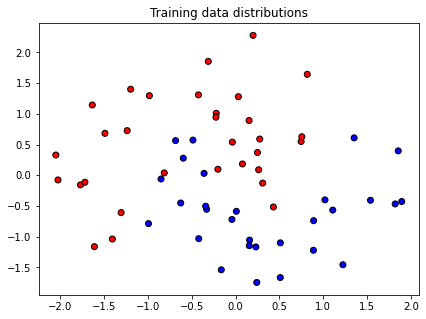

In [83]:
from matplotlib.colors import ListedColormap
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000','#0000FF'])
ax = plt.subplot(1,2,1)
ax.set_title("Training data distributions")
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')

In [84]:
# Use 60% training data to train a neural network with 3 hidden nodes. 

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=12,activation='logistic', max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=3,
              max_iter=500, random_state=12, solver='lbfgs')

In [85]:
# find slope and intercept of the line corresponnding to each hideen node (1st hidden layer)

def findSlopeIntercept(coefs,bias):
    hidden_wts=coefs[0]
    bias_wts=bias[0]
    num=len(hidden_wts[0])
    slopIntercept=[]
    for i in range(num):
        w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]]
        slope=w[1]/w[2]*(-1)
        intercept=w[0]/w[2]*(-1)
        slopIntercept.append([slope,intercept])
    return(slopIntercept)

In [86]:
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept

[[0.9543623899488972, -1.413505819224978],
 [0.6946701294093851, 1.087681812861583],
 [0.3218309265744093, -0.7210320603910124]]

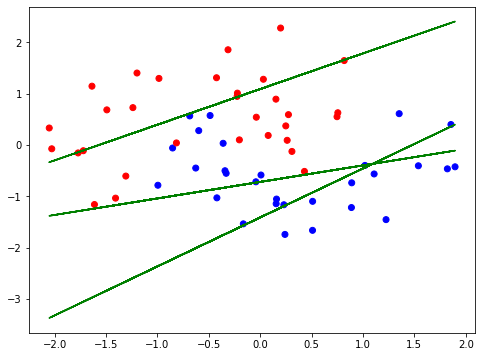

In [87]:
plt.figure(figsize=(8,6))
colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0], X_train[:,1], color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues = xvalues * slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues, yvalues, "g-")

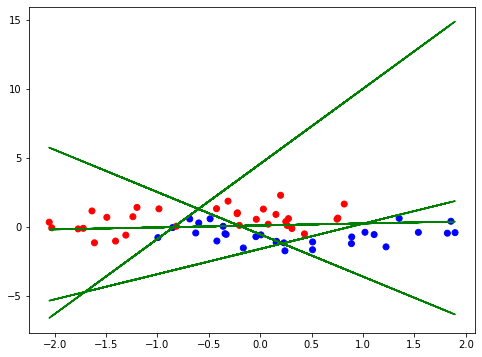

In [88]:
# Retrain the network using 4 hidden nodes
plt.figure(figsize=(8,6))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4, random_state=12,activation='logistic', max_iter=500)
clf.fit(X_train, y_train)

slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept

colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")

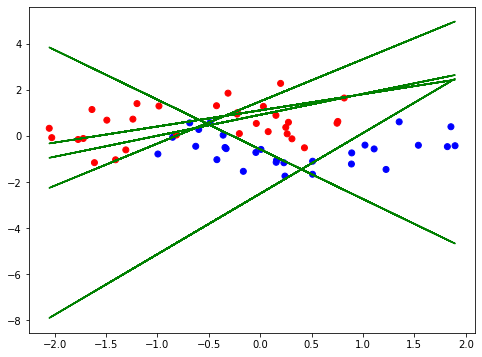

In [89]:
# Retrain the network using 5 hidden nodes
plt.figure(figsize=(8,6))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5, random_state=12,activation='logistic', max_iter=500)
clf.fit(X_train, y_train)

slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept

colors=["red","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"g-")

In [90]:
# Explain how does the neural network decision surface change

print("""When trained with 3 nodes, model tried to separate the training data by 3 lines decision boundry. 
There were lots of error in separating the classes

When trained with 4 nodes, model tried to separate the training data by 4 lines decision boundry. 
The model tried to separate classes in the regions with small number of errors

When trained with 5 nodes, model tried to separate the training data by 5 lines decision boundry. 
The model learned certain aspect of the training data but still made good amounts of errors. 
Adding additional node did not imporve the classification error. """)

When trained with 3 nodes, model tried to separate the training data by 3 lines decision boundry. 
There were lots of error in separating the classes

When trained with 4 nodes, model tried to separate the training data by 4 lines decision boundry. 
The model tried to separate classes in the regions with small number of errors

When trained with 5 nodes, model tried to separate the training data by 5 lines decision boundry. 
The model learned certain aspect of the training data but still made good amounts of errors. 
Adding additional node did not imporve the classification error. 


In [91]:
# Q11

import pandas as pd 
import numpy as np 
from sklearn.utils import shuffle

In [92]:
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

In [93]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18,9))
    
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = axarr.flatten()
    
    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index = unique_id * 10 + rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

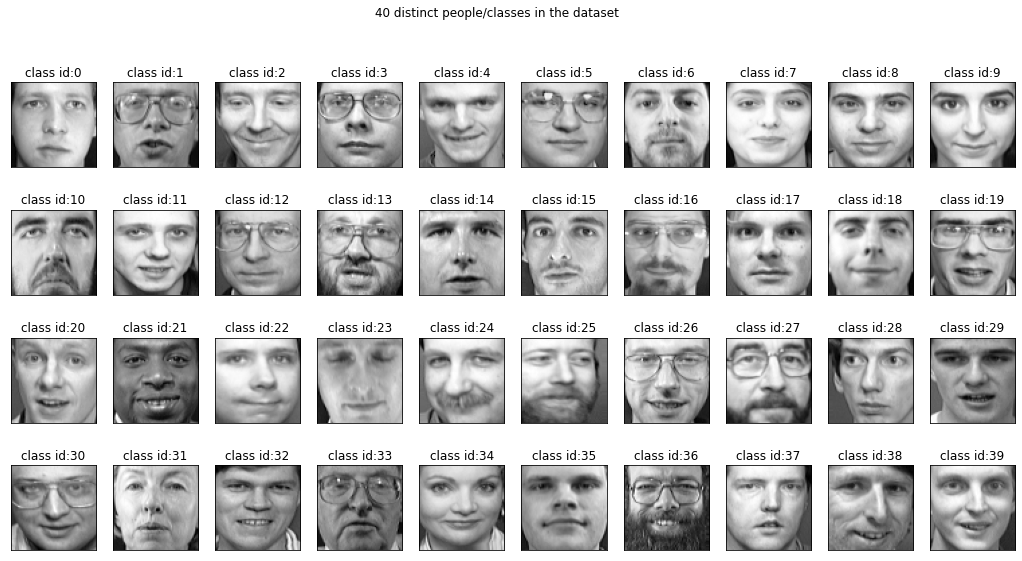

In [94]:
# show at least one face images for each class in the Oivetti face dataset100.
show_a_random_face_per_class(data, np.unique(target))

In [95]:
# Randomly split the dataset into 60% training and 40% test samples
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.4, stratify=target, random_state=1)

In [96]:
# Train a one-hidden layer neural network with 10 hidden nodes. 
# Report the classification accuracy of the classifier on the test set
from sklearn.neural_network import MLPClassifier
clf10 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=1000)
clf10.fit(X_train, y_train)

c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=1000,
              random_state=42, solver='lbfgs')

In [97]:
from sklearn.metrics import accuracy_score 
y_pred=clf10.predict(X_test)
accuracy_score(y_test, y_pred)

0.08125

In [98]:
# (1) one-hidden layer NN with 10 hidden nodes
# use one time 10-fold cross validation 
from sklearn.neural_network import MLPClassifier
clf10 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=1000)

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# evaluate model
scores = cross_val_score(clf10, X, target, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.060 (0.055)


In [99]:
# (2) one-hidden layer NN with 50 hidden nodes
# use one time 10-fold cross validation 
from sklearn.neural_network import MLPClassifier
clf50 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=50, random_state=42,activation='logistic',max_iter=1000)

# cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# evaluate model
scores = cross_val_score(clf50, X, target, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.675 (0.072)


In [100]:
# (3) one-hidden layer NN with 500 hidden nodes
# use one time 10-fold cross validation 
from sklearn.neural_network import MLPClassifier
clf500 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=500, random_state=42,activation='logistic',max_iter=1000)

# cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# evaluate model
scores = cross_val_score(clf500, X, target, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.064)


In [101]:
# (4) two-hidden layer NN with 50 hidden nodes (1st layer) and 10 hidden nodes (2n layer)
# use one time 10-fold cross validation 
from sklearn.neural_network import MLPClassifier
clf5010 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 10), random_state=42,activation='logistic',max_iter=1000)

# cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

# evaluate model
scores = cross_val_score(clf5010, X, target, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.447 (0.079)


In [102]:
print("""Adding 2nd hidden layer did not imporve the model performance.
One hidden layer with 500 nodes is the best model.""")

Adding 2nd hidden layer did not imporve the model performance.
One hidden layer with 500 nodes is the best model.
